<a href="https://colab.research.google.com/github/SunkaraboinaPraveenKumar/Machine_Learning_Projects/blob/main/NN_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Image batch shape: (1, 16, 16, 3)
Label batch shape: (1,)
Labels: [0]


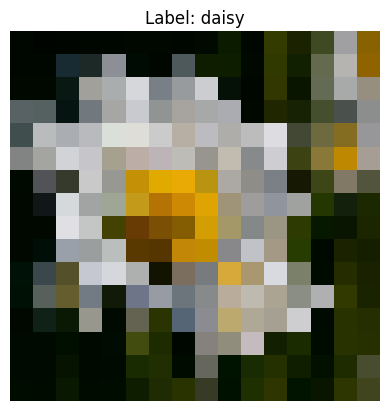

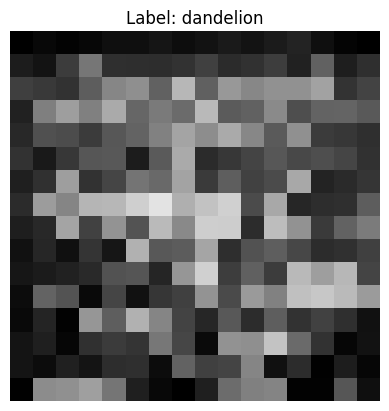

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Constants
IMG_HEIGHT = 16
IMG_WIDTH = 16
IMG_CHANNELS = 3
CLASS_NAMES = ["daisy", "dandelion", "roses", "sunflowers", "tulips"]

def read_and_decode(filename, resize_dims):
    img_bytes = tf.io.read_file(filename)
    img = tf.image.decode_jpeg(img_bytes, channels=IMG_CHANNELS)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = tf.image.resize(img, resize_dims)
    return img

def parse_csvline(csv_line):
    record_default = ["", ""]
    filename, label_string = tf.io.decode_csv(csv_line, record_default)

    img = read_and_decode(filename, [IMG_HEIGHT, IMG_WIDTH])

    # Convert label string to an integer index
    label = tf.where(tf.equal(CLASS_NAMES, label_string))[0, 0]

    return img, label

# Define datasets
train_dataset = (
    tf.data.TextLineDataset("gs://cloud-ml-data/img/flower_photos/train_set.csv")
    .map(parse_csvline, num_parallel_calls=tf.data.AUTOTUNE)
    .batch(1)
    .prefetch(tf.data.AUTOTUNE)
)

eval_dataset = (
    tf.data.TextLineDataset("gs://cloud-ml-data/img/flower_photos/eval_set.csv")
    .map(parse_csvline, num_parallel_calls=tf.data.AUTOTUNE)
    .batch(1)
    .prefetch(tf.data.AUTOTUNE)
)

for image_batch, label_batch in train_dataset.take(1):
    print("Image batch shape:", image_batch.shape)
    print("Label batch shape:", label_batch.shape)
    print("Labels:", label_batch.numpy())

import matplotlib.pyplot as plt

for image_batch, label_batch in train_dataset.take(2):
    # Take the first image from the batch
    first_image = image_batch[0]
    first_label = label_batch[0]

    # Convert tensor to numpy array
    plt.imshow(first_image.numpy())
    plt.title(f"Label: {CLASS_NAMES[first_label]}")
    plt.axis('off')
    plt.show()

In [2]:
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(len(CLASS_NAMES), activation="softmax")
])

model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=["accuracy"]
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [3]:
EPOCHS = 5

history = model.fit(
    train_dataset,
    validation_data=eval_dataset,
    epochs=EPOCHS
)

Epoch 1/5
   3299/Unknown 283s 85ms/step - accuracy: 0.3202 - loss: 1.5335

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


3300/3300 ━━━━━━━━━━━━━━━━━━━━ 314s 94ms/step - accuracy: 0.3203 - loss: 1.5335 - val_accuracy: 0.4541 - val_loss: 1.2286
Epoch 2/5
3300/3300 ━━━━━━━━━━━━━━━━━━━━ 256s 74ms/step - accuracy: 0.4453 - loss: 1.2807 - val_accuracy: 0.4541 - val_loss: 1.2187
Epoch 3/5
3300/3300 ━━━━━━━━━━━━━━━━━━━━ 226s 64ms/step - accuracy: 0.4680 - loss: 1.2278 - val_accuracy: 0.4838 - val_loss: 1.2050
Epoch 4/5
3300/3300 ━━━━━━━━━━━━━━━━━━━━ 247s 59ms/step - accuracy: 0.4945 - loss: 1.1720 - val_accuracy: 0.4784 - val_loss: 1.2454
Epoch 5/5
3300/3300 ━━━━━━━━━━━━━━━━━━━━ 200s 59ms/step - accuracy: 0.5141 - loss: 1.1342 - val_accuracy: 0.4946 - val_loss: 1.2291


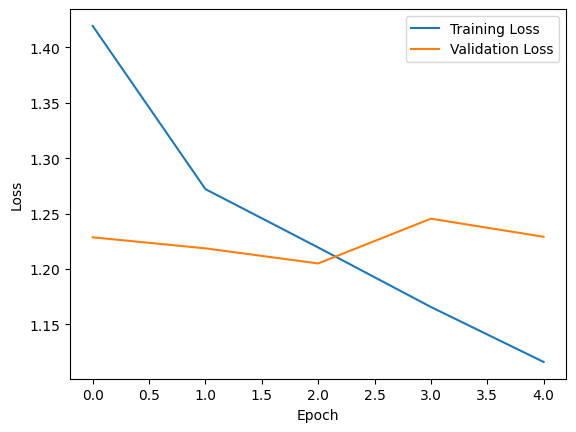

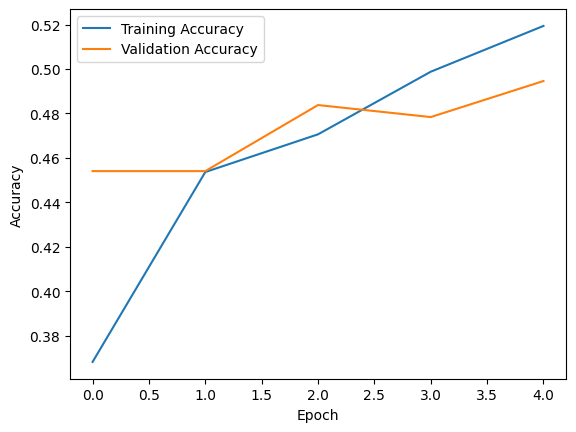

In [4]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()